In [1]:
# Append system path to include the config scripts
import sys
import os
from copy import deepcopy

print('importing lanfactory')
import lanfactory

print('importing ssms')
import ssms

print('importing hddm')
import hddm

sys.path.insert(1, os.path.join(sys.path[0], '..'))
from config import *
import config
import matplotlib.pyplot as plt

import tensorflow
import torch

import pandas as pd

import sklearn 
from sklearn.linear_model import LinearRegression
from kabuki.analyze import gelman_rubin

importing lanfactory
importing ssms
importing hddm
importing lanfactory
importing ssms
importing hddm


In [2]:
def ground_truth_from_parameter_dict(data = None,
                                     base_params_only = True,
                                     params = None,
                                     include_std = 0):
    data = deepcopy(data)
    param_dict_new = {}
    
    if base_params_only:
        # go row by row in data
        for i in range(data.shape[0]):
            # parameter dictionary
            parameter_dict_tmp = data.iloc[i, data.columns.get_loc('parameter_dict')]
            # cycle through parameters
            for param_tmp in params:
                if i == 0:
                    param_dict_new[param_tmp] = []
                    param_dict_new[param_tmp + '_posterior_mean'] = []
                
                # Append ground truth parameters
                param_dict_new[param_tmp].append(parameter_dict_tmp[param_tmp])
                # Append posterior mean
                param_dict_new[param_tmp + '_posterior_mean'].append(data.iloc[i]['traces'][param_tmp].mean())
    
    return pd.DataFrame.from_dict(param_dict_new)

### SETTINGS

In [ ]:
'proj_lan_pipeline/LAN_scripts/data/parameter_recovery/' + \
ddm/subj_10_trials_1000/report/ddm_recovery_main_dataframe.pickle

In [19]:
model = 'ddm'
params = ssms.config.model_config[model]['params']
subjects = 10
trials_per_subject = 1000
report_path = '/users/afengler/data/proj_lan_pipeline/' + \
                'LAN_scripts/data/parameter_recovery/' + model + '/' + \
                    'subj_' + str(subjects) + '_trials_' + \
                        str(trials_per_subject) + '/' + 'report/'
file_path = report_path + model + '_recovery_main_dataframe.pickle'
out = pickle.load(open(file_path, 'rb'))

### SOME BASIC SUMMARY INFO

In [12]:
# List r2 in table for each model ALL:
col_list = [param_tmp + '_r2' for param_tmp in params] + \
            ['mean_r2', 'model_id', 'n_hidden_layers', 'size_hidden_layers', 'val_loss']

out[col_list].drop_duplicates().reset_index()

,index,v_r2,a_r2,z_r2,t_r2,mean_r2,model_id,n_hidden_layers,size_hidden_layers,val_loss
0,0,0.941615,0.515808,0.572135,0.889259,0.729704,a37c06f6b44a11ecb4e5ac1f6b1b79e6,3,150,0.046712
1,200,0.976581,0.819953,0.934552,0.966485,0.924393,27f50aaab44a11ec8138ac1f6b627d2c,3,100,0.070670
2,400,0.897791,0.513678,0.428241,0.875546,0.678814,88309876b44a11ec8824ac1f6b1b7b16,3,120,0.052955
3,600,0.922824,0.371341,0.531779,0.901094,0.681759,27f7e5c2b44a11ecaac1ac1f6b1b7a2e,4,150,0.043254
4,800,0.892452,0.506646,0.450606,0.839487,0.672298,913b8d86b44a11eca86eac1f6b1b7afc,4,120,0.058520
5,1000,0.917469,0.421002,0.651499,0.882156,0.718032,ef781946b44a11eca6e9ac1f6b1b7a2e,5,150,0.040389
6,1200,0.887776,0.415900,0.496420,0.787753,0.646962,adcaf2a2b44a11ec8e2bac1f6b1b79e6,5,120,0.062067


In [17]:
# List r2 in table for each model ONLY CONVERGED:
col_list = [param_tmp + '_gl_ok_r2' for param_tmp in params] + \
            ['mean_gl_ok_r2', 'model_id', 'n_hidden_layers', 'size_hidden_layers', 'val_loss']

out.loc[out.gelman_rubin_ok == 1, :][col_list].drop_duplicates().reset_index()

,index,v_gl_ok_r2,a_gl_ok_r2,z_gl_ok_r2,t_gl_ok_r2,mean_gl_ok_r2,model_id,n_hidden_layers,size_hidden_layers,val_loss
0,0,0.942637,0.642261,0.625555,0.927269,0.784431,a37c06f6b44a11ecb4e5ac1f6b1b79e6,3,150,0.046712
1,200,0.963268,0.899325,0.966080,0.973508,0.950545,27f50aaab44a11ec8138ac1f6b627d2c,3,100,0.070670
2,401,0.877789,0.673891,0.539228,0.878117,0.742256,88309876b44a11ec8824ac1f6b1b7b16,3,120,0.052955
3,600,0.959342,0.625665,0.402219,0.929234,0.729115,27f7e5c2b44a11ecaac1ac1f6b1b7a2e,4,150,0.043254
4,801,0.719388,0.764680,0.612875,0.885238,0.745545,913b8d86b44a11eca86eac1f6b1b7afc,4,120,0.058520
5,1002,0.904900,0.519559,0.687827,0.926695,0.759745,ef781946b44a11eca6e9ac1f6b1b7a2e,5,150,0.040389
6,1206,0.852884,0.070811,0.078779,0.564673,0.391787,adcaf2a2b44a11ec8e2bac1f6b1b79e6,5,120,0.062067


### RUNTIME GRAPHS

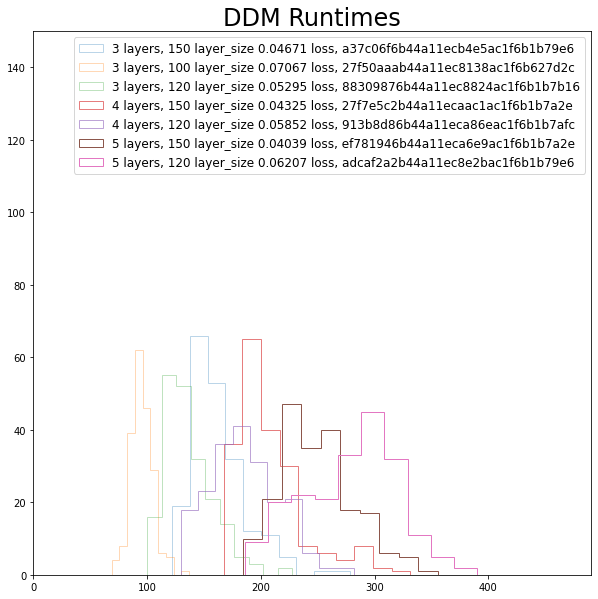

In [25]:
plt.figure(figsize = (10, 10))

for model_id in out['model_id'].unique():
    layer_alpha_dict = {3: 0.3, 4: 0.6, 5: 1}
    tmp_alpha = layer_alpha_dict[out.loc[out.model_id == model_id, 'n_hidden_layers'].unique()[0]]
    plt.title(model.upper() + ' Runtimes', fontsize = 24)
    plt.hist(out['time'].loc[out['model_id'] == model_id], 
             alpha = tmp_alpha,
             label = str(out.loc[out.model_id == model_id, 'n_hidden_layers'].unique()[0]) +  ' layers, ' + \
                str(out.loc[out.model_id == model_id, 'size_hidden_layers'].unique()[0]) + ' layer_size ' + \
                str(round(out.loc[out.model_id == model_id, 'val_loss'].unique()[0], 5)) + ' loss, ' + \
                model_id,
             histtype = 'step')
    plt.ylim((0, 150))
    plt.xlim((0, out['time'].max() + 100))
    plt.legend(loc = 'upper right', 
               fontsize = 12) 
plt.savefig(report_path + 'runtime_plots.png')

### CHAIN HEALTH

In [42]:
for model_id in out['model_id'].unique():
    tmp_dat = out.loc[out['model_id'] == model_id, :]
    tmp_shape = tmp_dat.shape[0]
    tmp_gl_ok = tmp_dat['gelman_rubin_ok'].sum()
    print('Model:', model_id + ',', 'proportion of good chains:', tmp_gl_ok / tmp_shape)

Model: a37c06f6b44a11ecb4e5ac1f6b1b79e6, proportion of good chains: 0.38
Model: 27f50aaab44a11ec8138ac1f6b627d2c, proportion of good chains: 0.65
Model: 88309876b44a11ec8824ac1f6b1b7b16, proportion of good chains: 0.27
Model: 27f7e5c2b44a11ecaac1ac1f6b1b7a2e, proportion of good chains: 0.32
Model: 913b8d86b44a11eca86eac1f6b1b7afc, proportion of good chains: 0.2
Model: ef781946b44a11eca6e9ac1f6b1b7a2e, proportion of good chains: 0.38
Model: adcaf2a2b44a11ec8e2bac1f6b1b79e6, proportion of good chains: 0.14


### PARAMETER RECOVERY PLOTS

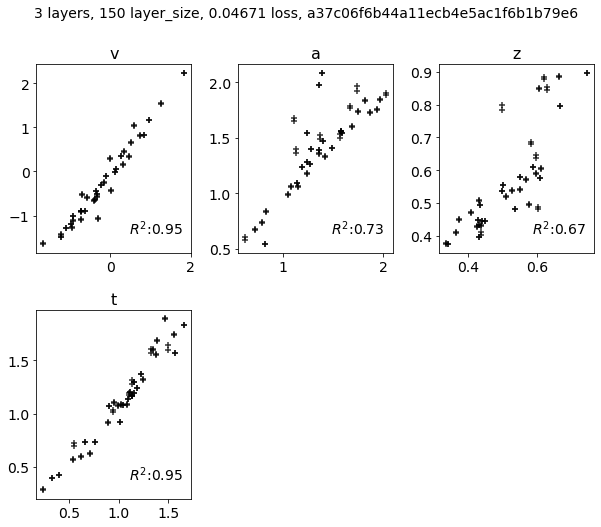

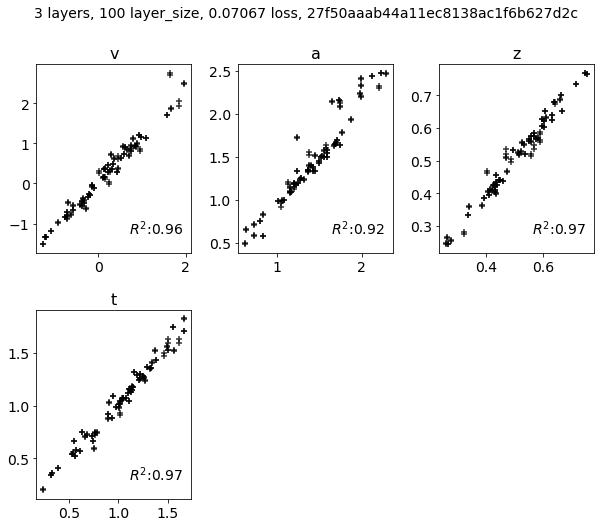

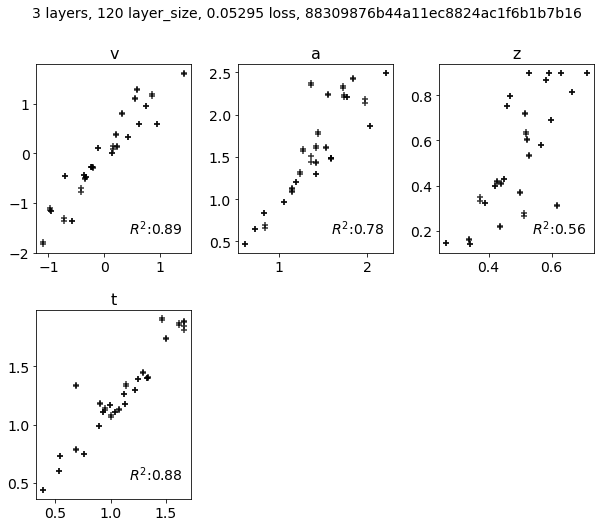

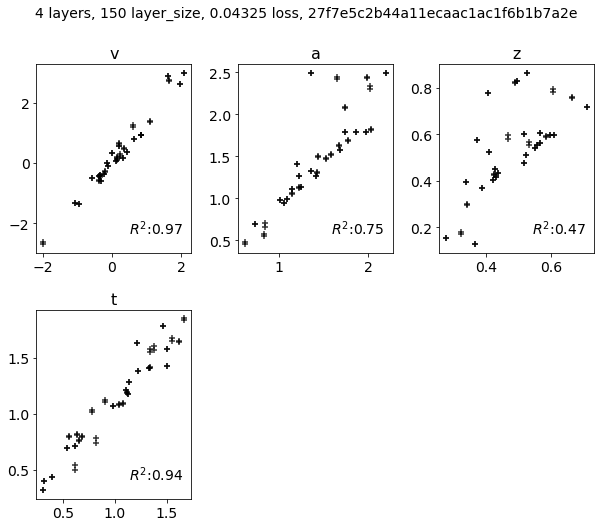

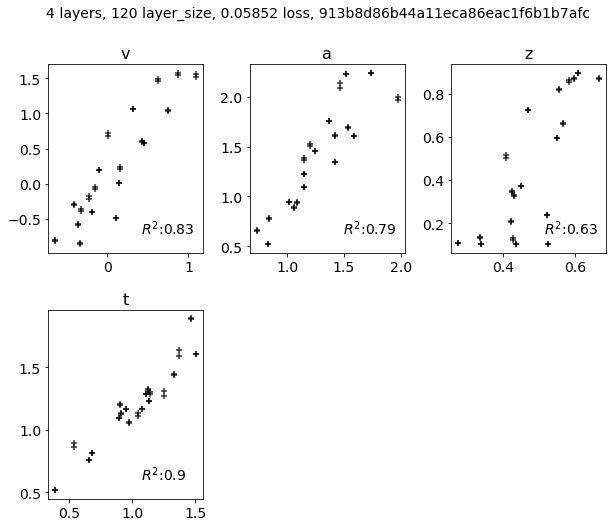

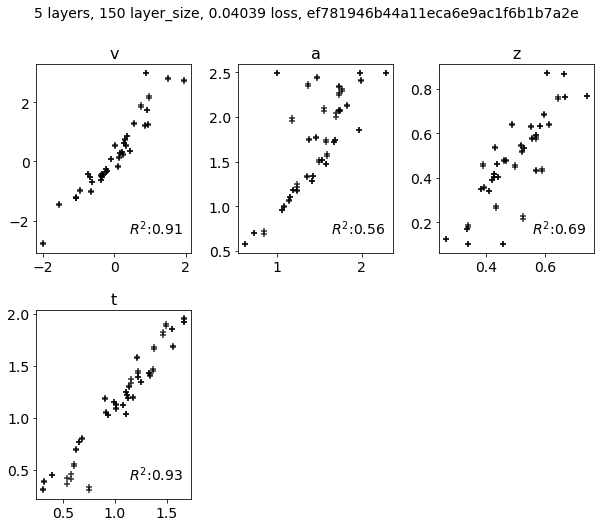

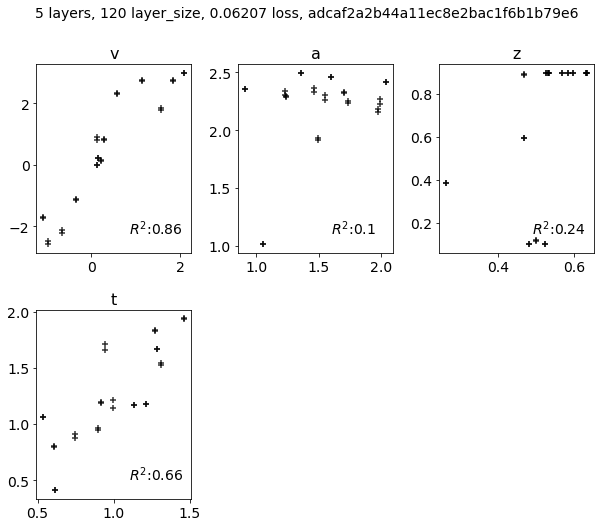

In [28]:
# Parameter Recovery Plots
cols = 3
filter_for_gelman = 1

if filter_for_gelman:
    out_tmp = out.loc[out.gelman_rubin_ok == 1, :]
else:
    out_tmp = out

for model_id in out_tmp['model_id'].unique():
    data_tmp = out_tmp.loc[out.model_id == model_id]
    param_df = ground_truth_from_parameter_dict(data = data_tmp,
                                                params = params)
    
    param_df['model_id'] = model_id
    
    fig, ax = plt.subplots(2, 3, figsize = (10, 8))
    fig.suptitle(str(out_tmp.loc[out_tmp.model_id == model_id, 'n_hidden_layers'].unique()[0]) +  ' layers, ' + \
                    str(out_tmp.loc[out_tmp.model_id == model_id, 'size_hidden_layers'].unique()[0]) + ' layer_size, ' + \
                        str(round(out_tmp.loc[out_tmp.model_id == model_id, 'val_loss'].unique()[0], 5)) + ' loss, ' + \
                            model_id, 
                 fontsize = 14)
    
    cnt = 0
    for param_tmp in params:       
        # Linear regression part:
        reg = LinearRegression().fit(np.expand_dims(param_df[param_tmp + '_posterior_mean'], 1), param_df[param_tmp]) 
        reg_score_tmp = reg.score(np.expand_dims(param_df[param_tmp + '_posterior_mean'], 1), param_df[param_tmp])
    
        row = int(np.floor(cnt / cols))
        col = cnt - row*cols
        ax[row, col].scatter(param_df[param_tmp], param_df[param_tmp + '_posterior_mean'], 
                             color = 'black', alpha = 0.8, marker='+')
        ax[row, col].text(0.60, 0.1, r'$R^2$:' + str(round(reg_score_tmp, 2)), 
                          transform=ax[row, col].transAxes,
                          fontsize = 14)
        ax[row, col].set_title(param_tmp, fontsize=16)
        ax[row, col].tick_params(axis='both', labelsize = 14)
        cnt += 1
    
    while cnt < ((row + 1) * cols):
        row = int(np.floor(cnt / 3))
        col = cnt - row*3
        ax[row, col].axis('off')
        cnt += 1
    

    plt.subplots_adjust(hspace=0.3, wspace = 0.3)
    plt.savefig(report_path +  model_id + '_ground_truth_vs_recovered.png')
    plt.show()